> ## **Machine Learning Aplicado II**
> ### **Professor:** Juan Gabriel Collona
> ### **Alunos:** Eduardo Sardinha e Volnei Klehm

# Objetivo

Descobrir os fatores que mais influenciam na expectativa de vida no mundo de forma geral, no Brasil de forma específica, e construiur um modelo que preveja a expectativa de vida de um indivíduo.

Usaremos os dados do dataset **Life Expectancy (WHO)** (https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/). Trata-se de um dataset público disponibilizado pela OMS (Organização Mundial de Saúde) que descreve fatores que influenciam a expectativa de vida em 193 países. O dataset contém dados coletados ao longo de 16 anos (2000-2015) e consiste de 22 colunas, 2938 linhas e 20 variáveis.

Nosso objetivo é analisar as variáveis mais relevantes e construir um modelo a partir desse subconjunto, avaliando o impacto delas no modelo de predição (regressão).

# Dados

In [4]:
# imports e configurações iniciais
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_theme()

import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px

In [5]:
# faz download do dataset do github
import requests

dataset = 'Life_Expectancy_Data.csv'
response = requests.get('https://github.com/e-sardinha/pos_uea/raw/refs/heads/main/ml2/projeto/dataset/Life%20Expectancy%20Data.csv')

with open(dataset, 'wb') as f:
    f.write(response.content)

# Pré-Processamento

## Exploração dos dados

In [6]:
df = pd.read_csv(dataset)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

É possível ver que temos apenas duas colunas categóricas ('Country' e 'Status'). Todas as demais colunas (inclusive a coluna alvo 'Life expectation') são **numéricas** e há valores faltantes em várias delas.

In [9]:
# normaliza espaços nos nomes das colunas (garante apenas um espaço entre palavras) e remove espaços em branco no início/fim
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True).str.strip()

df.columns = ['Country', 'Year', 'Status', 'Life expectancy', 
              'Adult mortality', 'Infant deaths', 'Alcohol', 
              'Percentage expenditure', 'Hepatitis B', 'Measles', 
              'BMI', 'Under-five deaths', 'Polio', 'Total expenditure', 
              'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 
              'Thinness 1-19 years', 'Thinness 5-9 years', 
              'Income', 'Schooling']

print(df.columns.tolist())

['Country', 'Year', 'Status', 'Life expectancy', 'Adult mortality', 'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years', 'Thinness 5-9 years', 'Income', 'Schooling']


In [10]:
# statistical summary
df.describe().drop(columns=['Year'])

,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income,Schooling
count,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Parece haver uma grande correlação entre os pares de variáveis ('Thinness 1-19 years', 'Thinness 5-9 years') e ('Infant deaths', 'Under-five deaths').

In [11]:
df[['Thinness 1-19 years', 'Thinness 5-9 years', 'Infant deaths', 'Under-five deaths']].describe()

,Thinness 1-19 years,Thinness 5-9 years,Infant deaths,Under-five deaths
count,2904.000000,2904.000000,2938.000000,2938.000000
mean,4.839704,4.870317,30.303948,42.035739
std,4.420195,4.508882,117.926501,160.445548
min,0.100000,0.100000,0.000000,0.000000
25%,1.600000,1.500000,0.000000,0.000000
50%,3.300000,3.300000,3.000000,4.000000
75%,7.200000,7.200000,22.000000,28.000000
max,27.700000,28.600000,1800.000000,2500.000000


Olhando as estatísticas descritivas dessas variáveis, parece que as colunas 'Thinness' carregam praticamente a mesma informação (inclusive quantitativa).

In [12]:
# comparação entre as variaveis 'Thinness 1-19 years' e 'Thinness 5-9 years'
fig = px.scatter(df, x="Thinness 1-19 years", y="Thinness 5-9 years", trendline="ols", \
                 title="Comparação entre 'Thinness 1-19 years' e 'Thinness 5-9 years'", color='Status')
fig.show()

In [13]:
# sns.scatterplot(data=df, x="Thinness 1-19 years", y="Thinness 5-9 years")
# plt.title("Comparação entre 'Thinness 1-19 years' e 'Thinness 5-9 years'")
# plt.show()

In [14]:
# coeficiente de correlação entre as variáveis Thinness '1-19 years' e '5-9 years'
print(df[["Thinness 1-19 years", "Thinness 5-9 years"]].corr())

                     Thinness 1-19 years  Thinness 5-9 years
Thinness 1-19 years             1.000000            0.939102
Thinness 5-9 years              0.939102            1.000000


Como pode-se verificar do gráfico de pontos acima e do coeficiente de correlação, trata-se praticamente da mesma variável, com a mesma curva de densidade de probabilidade (abaixo).

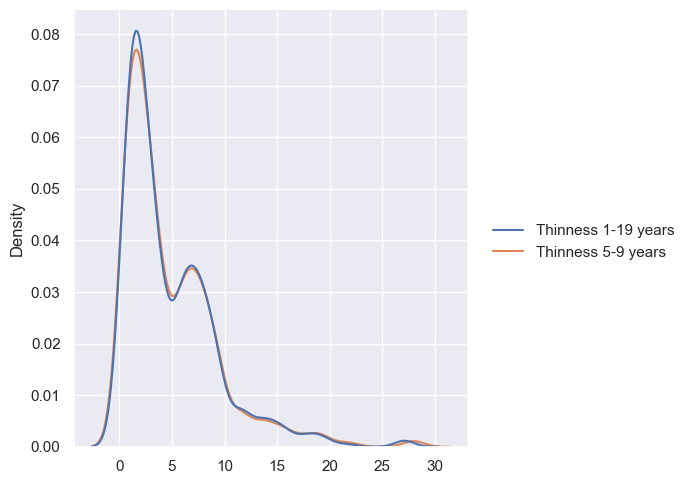

In [15]:
# plota curva de distribuição
sns.displot(df[["Thinness 1-19 years", "Thinness 5-9 years"]], kind="kde", fill=False)

Assim, vamos escolher como variável 'Thinness' a coluna 'Thinness 1-19 years'.

In [16]:
df.drop(columns=['Thinness 5-9 years'], inplace=True)
df.rename(columns={'Thinness 1-19 years': 'Thinness'}, inplace=True)

Ocorre algo semelhante com as variáveis 'Infant deaths' e 'Under-five deaths', como podemos ver do gráfico de pontos e coeficiente de correlação abaixo.

In [17]:
# comparação entre as variaveis 'Infant deaths' e 'Under-five deaths'
fig = px.scatter(df, x="Infant deaths", y="Under-five deaths", trendline="ols", \
                 title="Comparação entre 'Infant deaths' e 'Under-five deaths'", color='Status')
fig.show()

In [18]:
# coeficiente de correlação entre as variáveis 'Infant deaths' e 'Under-five deaths'
print(df[["Infant deaths", "Under-five deaths"]].corr())

                   Infant deaths  Under-five deaths
Infant deaths           1.000000           0.996629
Under-five deaths       0.996629           1.000000


Como ambas as variáveis carregam a informação de mortalidade infantil, escolheremos a coluna 'Infant deaths' para representar essa informação.

In [19]:
df.drop(columns=['Under-five deaths'], inplace=True)

In [20]:
# statistical summary
df.describe().drop(columns=['Year'])

,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness,Income,Schooling
count,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,0.627551,11.992793
std,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,0.210904,3.358920
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,0.493000,10.100000
50%,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,0.779000,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,0.948000,20.700000


## Visualização dos dados

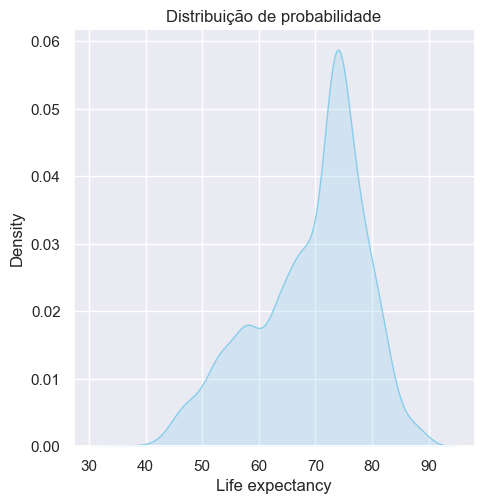

In [21]:
# grafico de distribuição de probabilidade da variavel target 'Life expectancy'
fig = sns.displot(df["Life expectancy"], kind="kde", fill=True, color="skyblue", bw_adjust=1)
plt.title("Distribuição de probabilidade")
plt.xlabel("Life expectancy")
plt.show()

In [22]:
# lista das features numéricas (e não categóricas)
features = df.columns.difference(['Country', 'Status', 'Year']).tolist()

# calcula a matriz de correlação
corr = df[features].corr().round(2)

# ordena por correlação com 'Life expectancy' (ordem decrescente)
features = corr['Life expectancy'].sort_values(ascending=False).index.tolist()

# reordena a matriz usando os índices ordenados
corr = corr.loc[features, features]

# matriz de correlação completa
fig = px.imshow(corr, 
          text_auto=True, color_continuous_scale='RdBu_r', title="Matriz de correlação de variáveis numéricas")
fig.update_layout(width=900, height=800)
fig.show()

In [23]:
# seleciona a correlação com a variável target 'Life expectancy'
corr = df[features].corr().round(2).query("index == 'Life expectancy'").T
corr

,Life expectancy
Life expectancy,1.00
Schooling,0.75
Income,0.72
BMI,0.57
Diphtheria,0.48
Polio,0.47
GDP,0.46
Alcohol,0.40
Percentage expenditure,0.38
Hepatitis B,0.26


In [24]:
# seleciona apenas os coeficientes cujo valor absoluto seja maior ou igual a 0.5
correlation_target = corr[corr['Life expectancy'].abs() >= 0.5].query("index != 'Life expectancy'")
correlation_target.sort_values(by='Life expectancy', ascending=False)

,Life expectancy
Schooling,0.75
Income,0.72
BMI,0.57
HIV/AIDS,-0.56
Adult mortality,-0.70


In [25]:
# plota scatter matrix com as features que mais se correlacionam com a variável target 'Life expectancy'
features = ["Adult mortality", "HIV/AIDS", "BMI", "Income", "Schooling", "Life expectancy"]

fig = px.scatter_matrix(df, dimensions=features, color='Life expectancy', title="Scatter Matrix")
fig.update_layout(height=900)
fig.show()

## Tratamento de dados incorretos e faltantes

In [29]:
# verifica se existe alguma coluna numérica com valores negativos
df[df.select_dtypes(include=[np.number]).lt(0).any(axis=1)].shape[0]

0

Não existem valores numéricos negativos. E já sabemos que temos valores faltantes em algunas colunas. Vamos aplicar a estratégia de preencher os faltantes com a **mediana** através de um **SimpleImputer**.

In [37]:
# identifica colunas com valores faltantes
print(df.isnull().sum())

Country                     0
Year                        0
Status                      0
Life expectancy            10
Adult mortality            10
Infant deaths               0
Alcohol                   194
Percentage expenditure      0
Hepatitis B               553
Measles                     0
BMI                        34
Polio                      19
Total expenditure         226
Diphtheria                 19
HIV/AIDS                    0
GDP                       448
Population                652
Thinness                   34
Income                    167
Schooling                 163
dtype: int64


In [39]:
# lista das colunas com valores faltantes
with_null = [col for col in df.columns if df[col].isnull().sum() > 0]
with_null

['Life expectancy',
 'Adult mortality',
 'Alcohol',
 'Hepatitis B',
 'BMI',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'GDP',
 'Population',
 'Thinness',
 'Income',
 'Schooling']

In [40]:
from sklearn.impute import SimpleImputer

# SimpleImputer com estratégia de mediana para valores faltantes
imputer = SimpleImputer(strategy="median")
df[with_null] = imputer.fit_transform(df[with_null])

In [42]:
# verifica se ainda existem valores nulos no dataframe
print(df.isnull().sum())

Country                   0
Year                      0
Status                    0
Life expectancy           0
Adult mortality           0
Infant deaths             0
Alcohol                   0
Percentage expenditure    0
Hepatitis B               0
Measles                   0
BMI                       0
Polio                     0
Total expenditure         0
Diphtheria                0
HIV/AIDS                  0
GDP                       0
Population                0
Thinness                  0
Income                    0
Schooling                 0
dtype: int64


## Divisão entre previsores (X) e classe (y)

In [46]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'Thinness', 'Income', 'Schooling'],
      dtype='object')

Vamos dividir os dados em 2 conjuntos:

a) dados para o processo de treino/teste do modelo, compreendendo os anos de 2000 a 2014;

b) dados do ano de 2015, para usar como entrada para o modelo de predição.

Além disso, vamos remover a coluna 'Year' porque estamos interessados no efeito global do período de 15 anos.

In [72]:
# separa variáveis independentes (X) e variável dependente (y)
vars = df.columns.tolist()
vars.remove('Life expectancy')

# separa dados em 2 dataframes: treino/teste (anos de 2000-2014) e outro de entrada (ano de 2015) para predição
df_data = df[df['Year'] < 2015].copy()
df_2015 = df[df['Year'] == 2015].copy()

# dados para treino/teste (remove a coluna 'Year')
X = df_data[vars].drop(columns=['Year'])
y = df_data['Life expectancy']

# dados de 2015 para predição
X_2015 = df_2015[vars].drop(columns=['Year'])
y_2015 = df_2015['Life expectancy']

## Pipeline de codificação e escalamento

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler
import joblib

# listas das features categóricas e numéricas
cat = ['Country', 'Status']
num = X.columns.difference(cat).tolist()

# pipeline para categóricas
cat_pipeline = Pipeline(steps=[
    ("encoder", OrdinalEncoder()),
    ("scaler", MinMaxScaler())
])

# pipeline geral
preprocess = ColumnTransformer(transformers=[
    ("scaler", MinMaxScaler(), num),
    ("cat", cat_pipeline, cat),
])

pipeline = Pipeline(steps=[("preprocess", preprocess)])

# ajusta o pipeline ao dataset
X_scaled = pipeline.fit_transform(X)

# salva o pipeline
joblib.dump(pipeline, "pipeline.pkl")

['pipeline.pkl']

## (TODO) Divisão das bases em treinamento e teste

In [ ]:
X = X_scaled # já normalizado
y = y.values

X.shape, y.shape # antes do balanceamento

((768, 8), (768,))

### Salva bases de treinamento e teste

In [ ]:
# Separa base de treinamento e teste
from sklearn.model_selection import train_test_split
X_treinar, X_teste, y_treinar, y_teste = train_test_split(X, y, test_size=0.30, random_state=742)

X_treinar.shape, y_treinar.shape, X_teste.shape, y_teste.shape

((700, 8), (700,), (300, 8), (300,))

In [56]:
# Separa base de teste (30% do dataset original)
from sklearn.model_selection import train_test_split
X_treina, X_teste, y_treina, y_teste = train_test_split(X, y, test_size=0.30, random_state=0)

X_treina.shape, y_treina.shape, X_teste.shape, y_teste.shape

((537, 8), (537,), (231, 8), (231,))

In [57]:
# Dados de treinamento e teste
X_treina, y_treina = X_treina_over, y_treina_over

X_treina.shape, y_treina.shape, X_teste.shape, y_teste.shape

((700, 8), (700,), (231, 8), (231,))

In [61]:
# salva os dados de treinamento e teste
joblib.dump((X_treina, y_treina, X_teste, y_teste), "content/dados_diabetes.pkl")

['content/dados_diabetes.pkl']

# (TODO) Modelos

In [70]:
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [93]:
# importa dados de treinamento e teste
X_treina, y_treina, X_teste, y_teste = joblib.load("content/dados_diabetes.pkl")

## KNN

In [195]:
# treina o modelo
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
knn.fit(X_treina, y_treina)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [196]:
# avalia o modelo
y_previsoes = knn.predict(X_teste)
print(classification_report(y_teste, y_previsoes))

              precision    recall  f1-score   support

    Diabetic       0.64      0.88      0.74        74
Non-Diabetic       0.93      0.77      0.84       157

    accuracy                           0.81       231
   macro avg       0.79      0.82      0.79       231
weighted avg       0.84      0.81      0.81       231



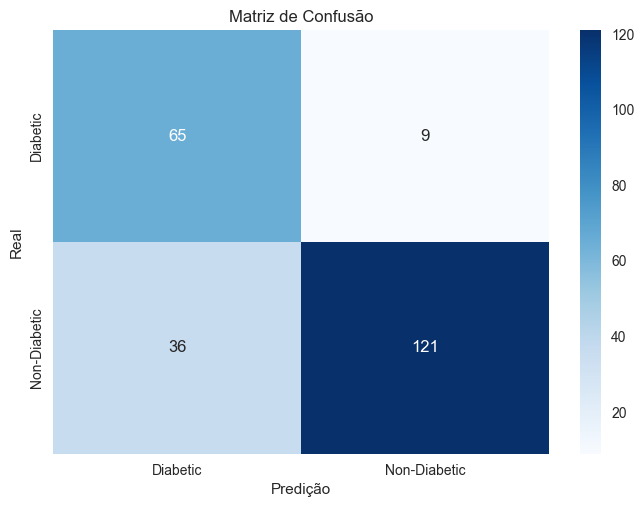

In [197]:
# matriz de confusão
cm = confusion_matrix(y_teste, y_previsoes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_teste), yticklabels=np.unique(y_teste))
plt.title("Matriz de Confusão")
plt.xlabel("Predição")
plt.ylabel("Real")
plt.show()

In [198]:
# salva classificador com joblib
joblib.dump(knn, "content/model_knn.pkl")

['content/model_knn.pkl']

## Árvore de Decisão

In [199]:
arvore = DecisionTreeClassifier(criterion='entropy', random_state = 42)
arvore.fit(X_treina, y_treina)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [200]:
# avalia o modelo
y_previsoes = arvore.predict(X_teste)
print(classification_report(y_teste, y_previsoes))

              precision    recall  f1-score   support

    Diabetic       0.75      0.88      0.81        74
Non-Diabetic       0.94      0.86      0.90       157

    accuracy                           0.87       231
   macro avg       0.84      0.87      0.85       231
weighted avg       0.88      0.87      0.87       231



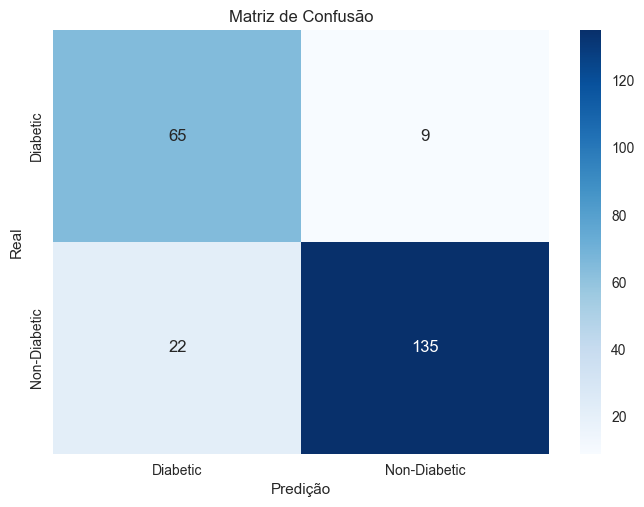

In [201]:
# matriz de confusão
cm = confusion_matrix(y_teste, y_previsoes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_teste), yticklabels=np.unique(y_teste))
plt.title("Matriz de Confusão")
plt.xlabel("Predição")
plt.ylabel("Real")
plt.show()

In [202]:
# salva classificador com joblib
joblib.dump(arvore, "content/model_arvore.pkl")

['content/model_arvore.pkl']

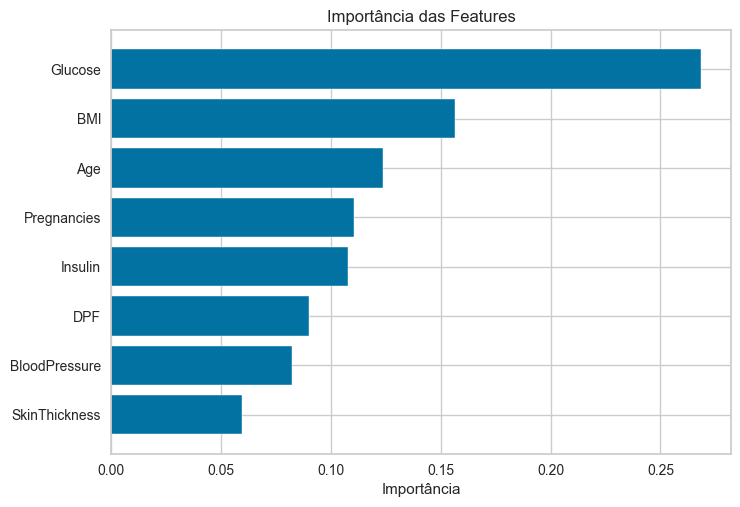

In [203]:
# importancia das features
importancia = arvore.feature_importances_
features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DPF", "Age"]
indices = np.argsort(importancia)

plt.barh(range(len(indices)), importancia[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Importância")
plt.title("Importância das Features")
plt.show()


## Random Forest

In [204]:
forest = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 42)
forest.fit(X_treina, y_treina)

,n_estimators,100
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [205]:
# avalia o modelo
y_previsoes = forest.predict(X_teste)
print(classification_report(y_teste, y_previsoes))

              precision    recall  f1-score   support

    Diabetic       0.84      0.97      0.90        74
Non-Diabetic       0.99      0.91      0.95       157

    accuracy                           0.93       231
   macro avg       0.91      0.94      0.92       231
weighted avg       0.94      0.93      0.93       231



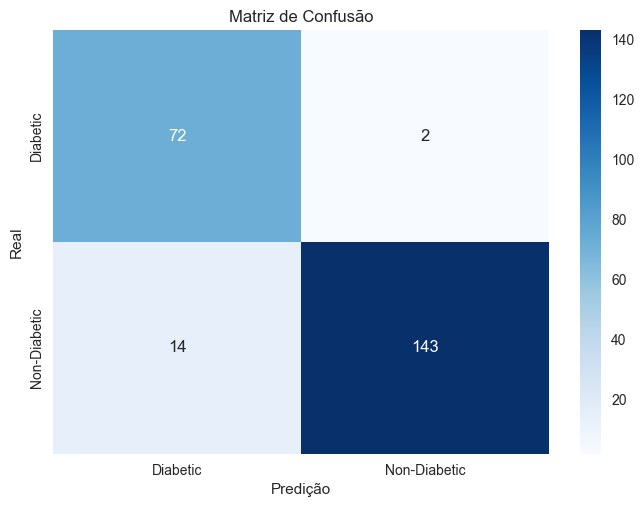

In [206]:
# matriz de confusão
cm = confusion_matrix(y_teste, y_previsoes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_teste), yticklabels=np.unique(y_teste))
plt.title("Matriz de Confusão")
plt.xlabel("Predição")
plt.ylabel("Real")
plt.show()

In [207]:
# salva classificador com joblib
joblib.dump(forest, "content/model_forest.pkl")

['content/model_forest.pkl']

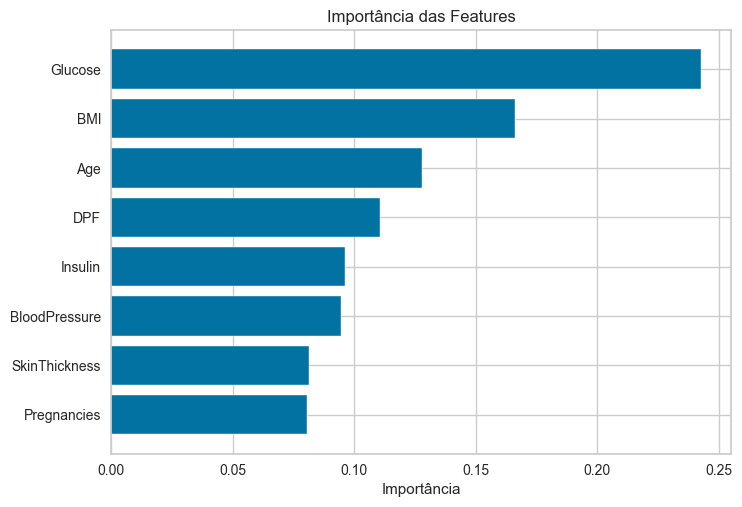

In [208]:
# importancia das features
importancia = forest.feature_importances_
features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DPF", "Age"]
indices = np.argsort(importancia)

plt.barh(range(len(indices)), importancia[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Importância")
plt.title("Importância das Features")
plt.show()

# (TODO) Aplicativo

In [209]:
import joblib
import pandas as pd
import gradio as gr

from pathlib import Path

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [210]:
# carrega modelos dos arquivos em um dicionario indexado pelo nome do arquivo apos o "_"
modelos = {}
for arquivo in Path("content").glob("model*.pkl"):
    print(f"loading {arquivo}")
    modelo = joblib.load(arquivo)
    modelos[arquivo.stem.split("_")[1]] = modelo

modelos

loading content\model_arvore.pkl
loading content\model_forest.pkl
loading content\model_knn.pkl


{'arvore': DecisionTreeClassifier(criterion='entropy', random_state=42),
 'forest': RandomForestClassifier(criterion='entropy', random_state=42),
 'knn': KNeighborsClassifier()}

In [211]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [214]:
# Classificador
def prever(nome_modelo, pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age):
    colunas = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DPF", "Age"]
    entrada = pd.DataFrame([[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age]], columns=colunas)

    # codifica a entrada
    pipeline = joblib.load("content/pipeline_diabetes_norm.pkl")
    entrada = pipeline.transform(entrada)

    # seleciona modelo carregado e faz a predição
    modelo = modelos[nome_modelo]
    pred = modelo.predict(entrada)[0]

    return pred

# Interface Gradio
interface = gr.Interface(
    fn=prever,
    inputs=[
        gr.Dropdown(choices=modelos.keys(), value='knn', label="Modelo"),
        gr.Slider(value=0, minimum=0, maximum=20, label="Pregnancies"),
        gr.Slider(value=100, minimum=0, maximum=300, label="Glucose"),
        gr.Slider(value=70, minimum=0, maximum=200, label="Blood Pressure"),
        gr.Slider(value=29, minimum=0, maximum=100, label="Skin Thickness"),
        gr.Slider(value=140, minimum=0, maximum=900, label="Insulin"),
        gr.Slider(value=32, minimum=0, maximum=100, label="BMI"),
        gr.Slider(value=0.47, minimum=0, maximum=3, label="DPF"),
        gr.Slider(value=30, minimum=0, maximum=100, label="Age"),
    ],
    outputs=gr.Text(label="Resultado da Predição"),
    title="Preditor de Diabetes",
    description="Ajuste os valores abaixo para prever a classe usando o modelo selecionado."
)

interface.launch(share=True)

* Running on local URL:  http://127.0.0.1:7868
* Running on public URL: https://574482af57e028e27a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
